# **Tutorial: Logistic Regression**
COSC 325: Machine Learning

#### **Objective of the Notebook**
The primary objective of this notebook is to provide a comprehensive, step-by-step guide on implementing logistic regression in Python.

#### Learning Outcomes
By the end of this tutorial, students will be able to:

1. ##### Load and Explore a Dataset:

    - Understand how to load data from a CSV file using pandas.
    - Perform initial exploratory data analysis (EDA) to understand the structure and content of the dataset.
    - Use functions like head(), describe(), and info() to inspect the dataset.

2. ##### Visualize the Data:

    - Use data visualization techniques to understand relationships and distributions within the data.
    - Create visualizations using seaborn and matplotlib to plot features and their relationships to the target variable.
      
3. ##### Preprocess the Data:

    - Handle missing values and encode categorical variables appropriately.
    - Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
      
4. ##### Build and Train a Logistic Regression Model:

    - Implement logistic regression using sklearn.linear_model.LogisticRegression.
    - Train the model on the training data and make predictions on both the training and testing sets.
      
5. ##### Evaluate the Model:

    - Understand and calculate various evaluation metrics, such as accuracy, precision, recall, F1 score, and confusion matrix.
    - Interpret these metrics to assess the model's performance and identify potential issues like overfitting.
      
6. ##### Visualize the Results:

     - Plot and interpret confusion matrices to understand the distribution of true positives, true negatives, false positives, and false negatives.

#### Prediction Task
Students are trying to predict the survival of passengers on the Titanic.

- Target Variable: Survived

    - `0` indicates the passenger did not survive.
    - `1` indicates the passenger survived.
      
- Features: Various attributes of the passengers, such as:

    - `Pclass:` Passenger class
    - `Sex:` Gender of the passenger
    - `Age:` Age of the passenger
    - `Siblings/Spouses Aboard:` Number of siblings/spouses aboard the Titanic
    - `Parents/Children Aboard:` Number of parents/children aboard the Titanic
    - `Fare:` The fare paid by the passenger

#### Summary of Steps

1. ##### Introduction to Logistic Regression:

    - Explanation of logistic regression, its purpose, and the mathematical formula.
    - 
2. ##### Loading and Exploring the Dataset:

    - Using pandas to load the dataset.
    - Performing EDA to understand the dataset structure and key statistics.
      
3. ##### Visualizing the Data:

    - Using seaborn and matplotlib to create visualizations that help understand the data.

4. ##### Preprocessing the Data:

    - Handling missing values and encoding categorical variables.
    - Splitting the dataset into training and testing sets.

5. ##### Building and Training the Model:

    - Initializing and training the logistic regression model.
    - Making predictions on the training and testing sets.

6. ##### Evaluating the Model:

    - Calculating and interpreting evaluation metrics.
    - Using confusion matrices to gain deeper insights into the model's performance.

7. ##### Visualizing the Results:
   
    - Plotting confusion matrices for both the training and testing sets to visually assess model performance.

Logistic regression is a statistical method for analyzing datasets in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

The logistic regression model is used to model the probability of a certain class or event. It uses a logistic function to model a binary dependent variable. The formula for logistic regression is:

$$
P(Y=1) = \frac{1}{1 + e^{-(b_0 + b_1X_1 + b_2X_2 + \cdots + b_nX_n)}}
$$

 
where:

- P(Y=1) is the probability of the outcome being 1 (success).

- `b_0` is the intercept.

- `b_1,b_2,…,b_n` are the coefficients of the independent variables `X_1, X_2,…,X_n`.

# Part 1: Step-by-Step Tutorial on Logistic Regression
## 1.1 Import Required Libraries

First, we need to import the necessary libraries for data manipulation, visualization, and machine learning. These libraries include:

**Here are the links to the official documentation for the libraries:**

- [NumPy Documentation](https://numpy.org/doc/stable/user/absolute_beginners.html)
- [pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- [Matplotlib Documentation](https://matplotlib.org/stable/users/explain/quick_start.html)
- [seaborn Documentation](https://seaborn.pydata.org/tutorial/introduction.html)
- [scikit-learn Documentation](https://scikit-learn.org/stable/)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## 1.2 Load and Explore the Dataset

Next, we load the dataset and perform initial exploration to understand its structure and contents.

- Here, we are using the `pandas` library to read the dataset and display its first few rows. This helps us understand the features and the target variable in our dataset.

In [2]:
# Load the dataset
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Display the summary statistics of the dataset
print(data.describe())

# Display the information about the dataset
print(data.info())

# Display the column names
print(data.columns)

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.

#### **Explanation:**

- The `head()` function shows the first few rows of the dataset, indicating the columns present and the data within them.

- The `describe()` function provides summary statistics such as count, mean, standard deviation, min, and max values for numerical columns.

- The `info()` function gives information on the data types and the number of non-null entries in each column.

- The `columns` attribute lists the names of all the columns in the dataset.

- **First Few Rows:** This helps in understanding the structure and content of the dataset, including the target variable Survived.

- **Summary Statistics:** Provides a quick overview of the dataset, showing the central tendency, dispersion, and shape of the distribution of the dataset's numerical columns.

- **Data Information:** Shows the data types and indicates if there are any missing values in the dataset.

- **Column Names:** Lists the feature names, which is useful for feature selection and understanding the dataset schema.

## 1.3 Visualize the Data

Visualizing the data helps us understand the relationships between different variables and the distribution of the data.
- In this section, we are using the `seaborn` and `matplotlib` libraries to create plots that show the distribution of features and the relationship between features and the target variable.

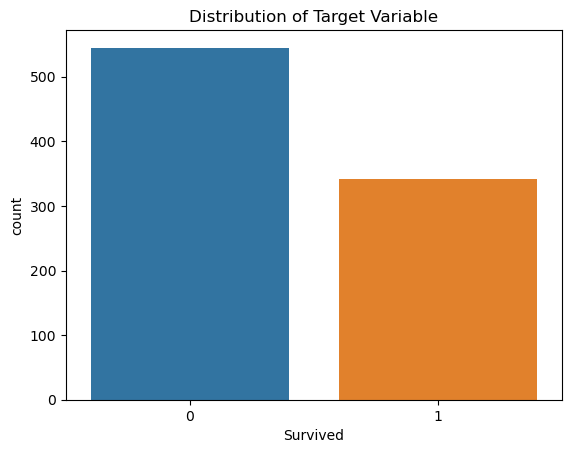

C:\Users\kmusg\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kmusg\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kmusg\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kmusg\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

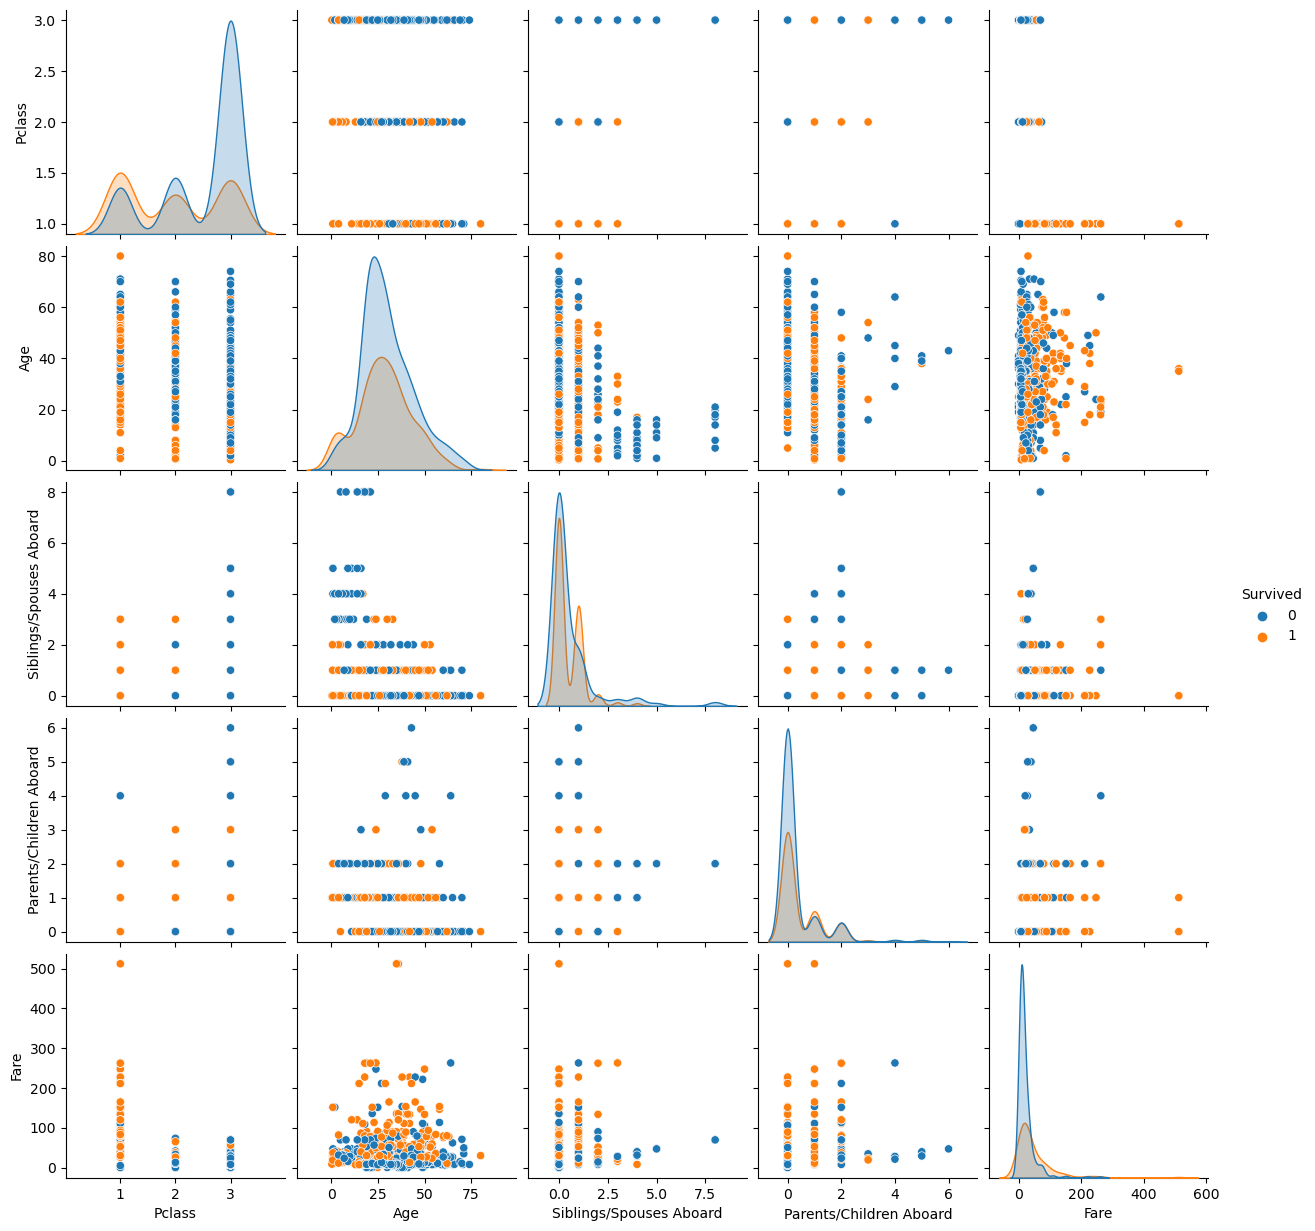

In [3]:
# Visualize the distribution of the target variable
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the relationship between features and the target variable
sns.pairplot(data, hue='Survived')
plt.show()

#### **Explanation:**
- The count plot shows the distribution of the target variable `Survived`, indicating how many passengers survived (1) and how many did not (0).

- The pair plot provides scatter plots of the relationships between pairs of features, colored by the target variable `Survived`.

- **Distribution of Target Variable:** Helps understand the class balance in the dataset. In this case, there are more passengers who did not survive compared to those who did.

**Detailed Explanation of Pair Plots:**

The pair plot in the image is a 5x5 grid showing relationships between five variables: Pclass, Age, Siblings/Spouses Aboard, Parents/Children Aboard, and Fare. Each plot is color-coded based on the target variable 'Survived' (blue for did not survive, orange for survived).

- Structure of the Pair Plot

    - Grid Layout: 5x5 matrix of subplots, each row and column corresponding to one variable.
    - Diagonal Plots: Histogram/density plots showing the distribution of each variable.
    - Off-Diagonal Plots: Scatter plots showing relationships between pairs of variables.

- Diagonal Plots (from top-left to bottom-right)

    - Pclass (1st row, 1st column):

        - Three distinct bars representing the three passenger classes.
        - More passengers in lower classes (higher numbers).
        - Higher proportion of orange (survived) in class 1 compared to classes 2 and 3.<p>

    - Age (2nd row, 2nd column):

        - Right-skewed distribution, peak around 20-30 years.
        - Higher density of orange (survived) for very young ages and some older ages.<p>

    - Siblings/Spouses Aboard (3rd row, 3rd column):

        - Most passengers have 0 or 1 sibling/spouse.
        - Survival rates seem higher for those with 1-2 siblings/spouses compared to 0 or 3+.<p>
    
    - Parents/Children Aboard (4th row, 4th column):
    
        - Majority have 0 parents/children aboard.
        - Slightly higher survival rates for those with 1-3 parents/children aboard.<p>
    
    - Fare (5th row, 5th column):
   
        - Highly right-skewed, most fares below 100.
        - Higher proportion of orange (survived) in higher fare ranges.<p>
   
   
- Off-Diagonal Plots

    - Pclass vs. Age (1st row, 2nd column / 2nd row, 1st column):

        - Slight trend of younger passengers in lower classes.
        - Higher survival rates (more orange) in upper classes across all ages.<p>
    
    - Pclass vs. Fare (1st row, 5th column / 5th row, 1st column):
    
        - Clear inverse relationship - higher class (lower Pclass number) corresponds to higher fares.
        - Distinct fare ranges for each class, with some overlap.
        - Higher survival rates in upper classes and higher fare ranges.<p>
          
    - Age vs. Fare (2nd row, 5th column / 5th row, 2nd column):

        - Weak positive correlation between age and fare.
        - Higher survival rates for children and in higher fare ranges.<p>
  
    - Siblings/Spouses Aboard vs. Parents/Children Aboard (3rd row, 4th column / 4th row, 3rd column):

        - Most passengers clustered at low values for both.
        - Those with moderate values (1-2) for both seem to have higher survival rates.<p>
 
    - Age vs. Siblings/Spouses Aboard (2nd row, 3rd column / 3rd row, 2nd column):
  
        - Younger passengers more likely to have siblings/spouses aboard.
        - Higher survival rates for children with siblings/spouses.<p>

   
- Key Insights for Logistic Regression
  
    - Pclass: Strong predictor of survival, with higher classes having better survival rates.
    - Age: Non-linear relationship with survival. Very young and some older passengers had higher survival rates.
    - Fare: Positive correlation with survival, possibly linked to Pclass.
    - Family Size: Moderate family size (Siblings/Spouses Aboard + Parents/Children Aboard) seems to correlate with higher survival rates.
    - Interactions: Consider interactions between variables, e.g., Age and Pclass, in the model.

These visualizations provide crucial insights for feature selection and potential feature engineering in the logistic regression model. They highlight the complex relationships between variables and their impact on survival probability.

## **1.4 Data Preprocessing**

Before building the model, we need to preprocess the data. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

- Here, we use the `train_test_split` function from `sklearn.model_selection` to split the dataset. We typically use 80-90% of the data for training and the rest for testing (unless the dataset is very large).

In [4]:
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Select features and target variable
features = ['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Sex_male']
X = data[features]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **1.5 Build and Train the Logistic Regression Model**
Now, we build and train the logistic regression model using the training data.

- The logistic regression model is built using the `LogisticRegression` class from `sklearn.linear_model`. We fit the model on the training data and make predictions on both the training and testing sets.

In [5]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=200)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

## **1.6 Evaluate the Model**
We evaluate the model using various metrics such as accuracy, precision, recall, F1 score, and confusion matrix.

- The evaluation metrics are calculated for both the training and testing sets. This helps us understand how well the model performs on the data it was trained on and how well it generalizes to new, unseen data.


### **1.6.1**

In [10]:
# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Calculate evaluation metrics for the testing data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Testing Accuracy: {accuracy_test:.2f}')
print(f'\nTraining Precision: {precision_train:.2f}')
print(f'Testing Precision: {precision_test:.2f}')
print(f'\nTraining Recall: {recall_train:.2f}')
print(f'Testing Recall: {recall_test:.2f}')
print(f'\nTraining F1 Score: {f1_train:.2f}')
print(f'Testing F1 Score: {f1_test:.2f}')
print('\nTraining Confusion Matrix:')
print(conf_matrix_train)
print('\nTesting Confusion Matrix:')
print(conf_matrix_test)

Training Accuracy: 0.82
Testing Accuracy: 0.75

Training Precision: 0.78
Testing Precision: 0.73

Training Recall: 0.72
Testing Recall: 0.55

Training F1 Score: 0.75
Testing F1 Score: 0.63

Training Confusion Matrix:
[[379  55]
 [ 76 199]]

Testing Confusion Matrix:
[[97 14]
 [30 37]]


#### **Explanation:**

- **Training vs. Testing Metrics:** The training accuracy is higher than the testing accuracy, indicating that the model performs better on the data it was trained on compared to unseen data.

- **Precision:** Measures the accuracy of the positive predictions. A lower precision on the testing set suggests that some of the predicted survivors were actually not survivors.
  
- **Recall:** Measures the model's ability to identify all positive instances. The recall is lower on the testing set, indicating the model missed several actual survivors.

- **F1 Score:** Harmonic mean of precision and recall, providing a balance between the two. Lower F1 score on the testing set suggests the model struggles to generalize.

- **Confusion Matrices:** Provide a detailed breakdown of the true positive, true negative, false positive, and false negative predictions. The testing confusion matrix shows more misclassifications compared to the training matrix.

### **1.6.2**

In [11]:
# Generate and print classification reports
class_report_train = classification_report(y_train, y_train_pred)
class_report_test = classification_report(y_test, y_test_pred)

print('\nTraining Classification Report:')
print(class_report_train)
print('Testing Classification Report:')
print(class_report_test)


Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       434
           1       0.78      0.72      0.75       275

    accuracy                           0.82       709
   macro avg       0.81      0.80      0.80       709
weighted avg       0.81      0.82      0.81       709

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.82       111
           1       0.73      0.55      0.63        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.75      0.75      0.74       178



### Evaluating the Model: Which Way is Better and Why?

When evaluating a classification model, it's essential to choose metrics that give a comprehensive understanding of the model's performance, particularly considering the problem context and the data characteristics. Here's a comparison of the different evaluation methods used:

### Metrics in 1.6.1

**1.6.1** provides:
- **Accuracy** for training and testing sets.
- **Precision** for training and testing sets.
- **Recall** for training and testing sets.
- **F1 Score** for training and testing sets.

#### Explanation:

- **Accuracy**: Measures the overall correctness of the model's predictions.
- **Precision**: Measures the accuracy of the positive predictions.
- **Recall**: Measures the ability of the model to identify all positive instances.
- **F1 Score**: Balances precision and recall, providing a single metric that accounts for both.

These metrics provide a comprehensive overview of the model's performance, especially useful for imbalanced datasets.

### Metrics in 1.6.2

**1.6.2** provides a classification report, which includes:
- **Precision**, **Recall**, and **F1 Score** for each class (0 and 1) in both training and testing sets.
- **Support** for each class, indicating the number of true instances.
- **Macro Average** for precision, recall, and F1 score.
- **Weighted Average** for precision, recall, and F1 score.

#### Explanation:

- **Class-wise Metrics**: Offer detailed insights into how the model performs on each class individually.
- **Support**: Helps understand the distribution of the classes.
- **Macro Average**: Treats all classes equally, useful for understanding overall performance without being influenced by class imbalance.
- **Weighted Average**: Reflects the actual performance considering the class distribution, giving more importance to the majority class.

### Differences in Numbers

#### Accuracy

**Training Accuracy: 0.82** (1.6.1) vs **Testing Accuracy: 0.75** (1.6.1)

- Accuracy is the same in both sections for training and testing sets. It measures the overall correctness of predictions.

#### Precision

**Training Precision: 0.78** (1.6.1) vs **Testing Precision: 0.73** (1.6.1)

- **1.6.1** provides a single precision value for the entire dataset.
- **1.6.2** breaks down precision for each class:
  - For class 0: Precision (training: 0.83, testing: 0.76)
  - For class 1: Precision (training: 0.78, testing: 0.73)
- **Macro avg** (1.6.2) precision:
  - Training: 0.81
  - Testing: 0.74
- **Weighted avg** (1.6.2) precision:
  - Training: 0.82
  - Testing: 0.75

#### Recall

**Training Recall: 0.72** (1.6.1) vs **Testing Recall: 0.55** (1.6.1)

- **1.6.1** provides a single recall value for the entire dataset.
- **1.6.2** breaks down recall for each class:
  - For class 0: Recall (training: 0.87, testing: 0.87)
  - For class 1: Recall (training: 0.72, testing: 0.55)
- **Macro avg** (1.6.2) recall:
  - Training: 0.80
  - Testing: 0.71
- **Weighted avg** (1.6.2) recall:
  - Training: 0.82
  - Testing: 0.75

#### F1 Score

**Training F1 Score: 0.75** (1.6.1) vs **Testing F1 Score: 0.63** (1.6.1)

- **1.6.1** provides a single F1 score for the entire dataset.
- **1.6.2** breaks down F1 score for each class:
  - For class 0: F1 Score (training: 0.85, testing: 0.81)
  - For class 1: F1 Score (training: 0.75, testing: 0.63)
- **Macro avg** (1.6.2) F1 score:
  - Training: 0.80
  - Testing: 0.72
- **Weighted avg** (1.6.2) F1 score:
  - Training: 0.82
  - Testing: 0.74

### Explanation of Differences

1. **Class-wise Breakdown**:
   - **1.6.2** provides precision, recall, and F1 scores for each class separately. This allows for a more detailed analysis of the model's performance on each class, revealing that the model performs differently on the two classes. For instance, the model has higher precision and recall for class 0 (did not survive) compared to class 1 (survived).
   
2. **Macro vs. Weighted Averages**:
   - **Macro Average** treats all classes equally, providing an unweighted mean. This is useful for understanding performance across all classes without being influenced by class frequencies.
   - **Weighted Average** considers the support (number of true instances) of each class, giving more importance to the performance on more frequent classes. This reflects the overall performance more accurately in imbalanced datasets.

3. **Detailed Class-wise Metrics vs. Aggregate Metrics**:
   - **1.6.1** gives aggregate metrics for the entire dataset, providing a high-level overview.
   - **1.6.2** offers detailed metrics for each class, showing where the model might be biased or where it needs improvement.

### Conclusion

**1.6.2** provides a more detailed and comprehensive evaluation by breaking down metrics for each class and offering macro and weighted averages. This is especially important in imbalanced datasets, where aggregate metrics like accuracy can be misleading.

- **For a high-level overview**, **1.6.1** is sufficient.
- **For a detailed analysis and deeper understanding of model performance, particularly in imbalanced datasets**, **1.6.2** is better. It helps identify specific areas for improvement and ensures that the model performs well across all classes, not just the majority class.


## **1.7 Visualize the Results**
Finally, we visualize the results using the confusion matrix to understand the model's performance.
 - Confusion matrices for both the training and testing sets are plotted to visualize the number of true positives, true negatives, false positives, and false negatives.

Text(0.5, 1.0, 'Testing Confusion Matrix')

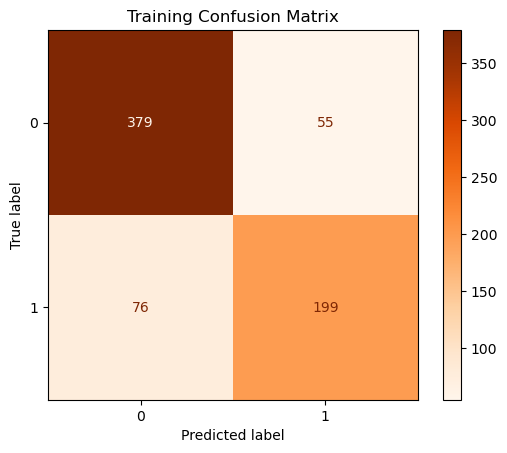

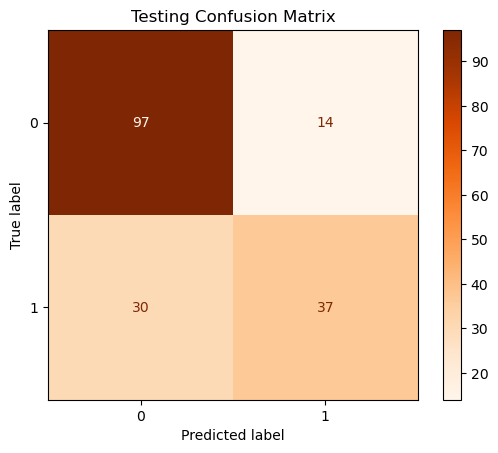

In [7]:
plt_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train)
plt_train.plot(cmap='Oranges')
plt_train.ax_.set_title('Training Confusion Matrix')

plt_test = ConfusionMatrixDisplay(conf_matrix_test)
plt_test.plot(cmap='Oranges')
plt_test.ax_.set_title('Testing Confusion Matrix')

#### **Explanation:**

**Training Confusion Matrix Visualization:**
- True Positives (TP = 379): The number of passengers correctly predicted to have survived.
- True Negatives (TN = 199): The number of passengers correctly predicted to not have survived.
- False Positives (FP = 55): The number of passengers incorrectly predicted to have survived, but they did not.
- False Negatives (FN = 76): The number of passengers incorrectly predicted to not have survived, but they did.

The values in the training confusion matrix indicate that the model has learned the patterns in the training data well, but there are still some misclassifications. The relatively high number of true positives and true negatives compared to false positives and false negatives suggests that the model has a good fit on the training data.

**Testing Confusion Matrix Visualization:**
- True Positives (TP = 97): The number of passengers correctly predicted to have survived.
- True Negatives (TN = 37): The number of passengers correctly predicted to not have survived.
- False Positives (FP = 14): The number of passengers incorrectly predicted to have survived, but they did not.
- False Negatives (FN = 30): The number of passengers incorrectly predicted to not have survived, but they did.

The testing confusion matrix shows a higher proportion of misclassifications compared to the training confusion matrix. This indicates that the model's performance drops when applied to unseen data. Specifically, the false negative rate is notable, meaning the model frequently fails to identify actual survivors.


**Analysis of Model Performance:**
- **Training vs. Testing Performance:**

    - **True Positives and True Negatives:** Both matrices show that the model is reasonably good at identifying true positives and true negatives, but performance decreases in the testing set.
    - **False Positives and False Negatives:** The increase in false positives and false negatives in the testing set suggests that the model is overfitting the training data. Overfitting means the model captures noise and patterns specific to the training set, reducing its generalizability to new data.
- **Impact on Metrics:**

    - **Accuracy:** The overall accuracy is lower in the testing set, reflecting the higher rate of misclassifications.
    - **Precision and Recall:** The lower recall on the testing set is particularly concerning, as it indicates the model's poor ability to detect all positive instances (survivors). Precision is also lower, but the impact is less pronounced than recall.

**Visual Representation:**
The confusion matrix visualization aids in quickly assessing the performance of the model. The heatmap colors represent the counts of true and false predictions, with darker shades indicating higher counts. This visual aid helps to intuitively understand where the model is making errors and to what extent.

**Conclusion:**
The confusion matrices provide a comprehensive view of the model's performance, highlighting both strengths and weaknesses. The visual and numerical insights gained from these matrices are crucial for diagnosing issues such as overfitting and for guiding further improvements to the model. For instance, to address overfitting, one might consider techniques such as cross-validation, regularization, or gathering more training data(we will get to in later in the course).